In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
from matplotlib.colors import LinearSegmentedColormap

In [4]:
df = pd.read_csv('IscoEvents.csv')

In [5]:
df

,Player,Event,Mins,Secs,EndX,EndY,StartX,StartY,Pass Res
0,Isco,Pass,0,0,92,63,98,98,UN
1,Isco,Pass,0,0,89,55,76,92,UN
2,Isco,Pass,0,0,90,82,75,33,SU
3,Isco,Pass,0,0,90,82,76,67,SU
4,Isco,Pass,0,0,86,10,96,4,SU
5,Isco,Pass,0,0,87,10,77,28,SU
6,Isco,Pass,0,0,92,28,73,45,SU
7,Isco,Pass,0,0,74,43,79,36,KP
8,Isco,Pass,0,0,80,37,81,23,SU
9,Isco,Pass,0,0,78,33,83,27,SU


In [6]:
df['StartX'] = df['StartX']*1.2
df['StartY'] = df['StartY']*0.8
df['EndX'] = df['EndX']*1.2
df['EndY'] = df['EndY']*0.8

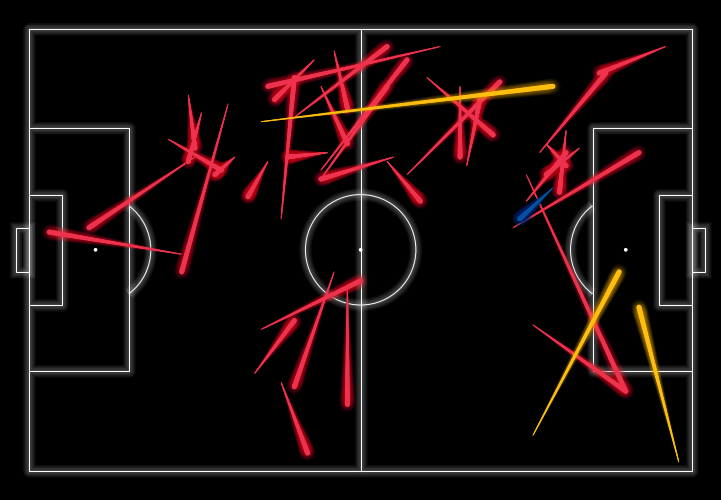

In [7]:
LINEWIDTH = 5  # starting linewidth
DIFF_LINEWIDTH = 1.2 # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

BACKGROUND_COLOR = '#000000'
SU = '#EE324E'
UN = '#FEBE10'
KP = '#00529F'
LINE_COLOR = '#FFF'

# plot as initial pitch and the lines with alpha=1
# I have used grid to get a title and endnote axis automatically, but you could you pitch.draw()
pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=1,
              line_alpha=1, goal_alpha=1, goal_type='box')
fig, ax = pitch.grid(grid_height=0.75, title_height=0, axis=False,
                     endnote_height=0, title_space=0, endnote_space=0)
fig.set_facecolor(BACKGROUND_COLOR)
for i in range(len(df['StartX'])):
    if df['Pass Res'][i] == 'SU':
        pitch.lines(df['StartX'][i], df['StartY'][i],
                df['EndX'][i],df['EndY'][i],
            capstyle='round',  # cut-off the line at the end-location.
            linewidth=LINEWIDTH, color=SU, comet=True,zorder =1, ax=ax['pitch'])
    if df['Pass Res'][i] == 'UN':
        pitch.lines(df['StartX'][i], df['StartY'][i],
                df['EndX'][i],df['EndY'][i],
            capstyle='round',  # cut-off the line at the end-location.
            linewidth=LINEWIDTH, color=UN, comet=True, ax=ax['pitch'])
    if df['Pass Res'][i] == 'KP':
        pitch.lines(df['StartX'][i], df['StartY'][i],
                df['EndX'][i],df['EndY'][i],
            capstyle='round',  # cut-off the line at the end-location.
            linewidth=LINEWIDTH, color=KP, comet=True, ax=ax['pitch'])
# plotting the glow effect. it is essentially a loop that plots the line with
# a low alpha (transparency) value and gradually increases the linewidth.
# This way the center will have more color than the outer area.
# you could break this up into two loops if you wanted the pitch lines to have wider glow
for i in range(1, NUM_GLOW_LINES + 1):
    pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,
                  linewidth=1 + (DIFF_LINEWIDTH * i),
                  line_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_type='box')
    pitch.draw(ax=ax['pitch'])  # we plot on-top of our previous axis from pitch.grid
    for j in range(len(df['StartX'])):
        if df['Pass Res'][j] == 'SU':
            pitch.lines(df['StartX'][j], df['StartY'][j],
                df['EndX'][j],df['EndY'][j],
            linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                capstyle='round',  # capstyle round so the glow extends past the line
                alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES,
                color=SU, comet=True, zorder =1,ax=ax['pitch'])
        if df['Pass Res'][j] == 'UN':
            pitch.lines(df['StartX'][j], df['StartY'][j],
                df['EndX'][j],df['EndY'][j],
             linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                capstyle='round',  # capstyle round so the glow extends past the line
                alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES,
                color=UN, comet=True, ax=ax['pitch'])
        if df['Pass Res'][j] == 'KP':
            pitch.lines(df['StartX'][j], df['StartY'][j],
                df['EndX'][j],df['EndY'][j],
             linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                capstyle='round',  # capstyle round so the glow extends past the line
                alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES,
                color=KP, comet=True, ax=ax['pitch'])